<a href="https://colab.research.google.com/github/akbism/case_studies/blob/main/Arya_EDA_and_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Incident detection and Root Cause Analysis
**Submitted By:**   <br>Amar Kumar<br> Pune

This is the script #1 for exploratory data analysis and binary classification model to detect NORMAL / FAIL.

## Setting up the environment

In [ ]:
# Setting up the environment
!pip install scikit-learn#==0.23.2
!pip install pycaret
!pip install shap
!pip install explainerdashboard
# Google drive
from google.colab import drive
drive.mount('/content/gdrive')

### Restart runtime after installing scikit-learn==0.23.2 
# Can be done thru the below command
import os
os.kill(os.getpid(), 9)

ERROR: Invalid requirement: 'scikit-learn#==0.23.2'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Reading all libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from pycaret.classification import * 

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', True)
np.set_printoptions(precision=4, suppress=True)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# Setting up the folder
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Arya
# !mkdir classifier-data
# !tar -xvf "classifier-data.tar.gz" -C "classifier-data"

/content/gdrive/My Drive/Colab Notebooks/Arya


## Reading the input dataset




In [25]:
df= pd.read_csv('training_set.csv')#, sep='\t', header=None, names = ['user_id', 'activity_date', 'activity_type'])
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# # Data Cleaning: Remove the data is timestamp filter not found
# df=df[~df.timestamp.isnull()]

# # Create two additional features
# df['hour']=pd.to_datetime(df['timestamp']).dt.hour
# df['date']=pd.to_datetime(df['timestamp']).dt.date

In [9]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.56,0.00,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.70,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.12,0.25,0.00,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


## Data Partioning - Training / Test

In [26]:
train, test = train_test_split(df, test_size=0.25, random_state=42)

## Basic exploratory data analysis

Text(0.5, 1.0, 'Multicollinearity')

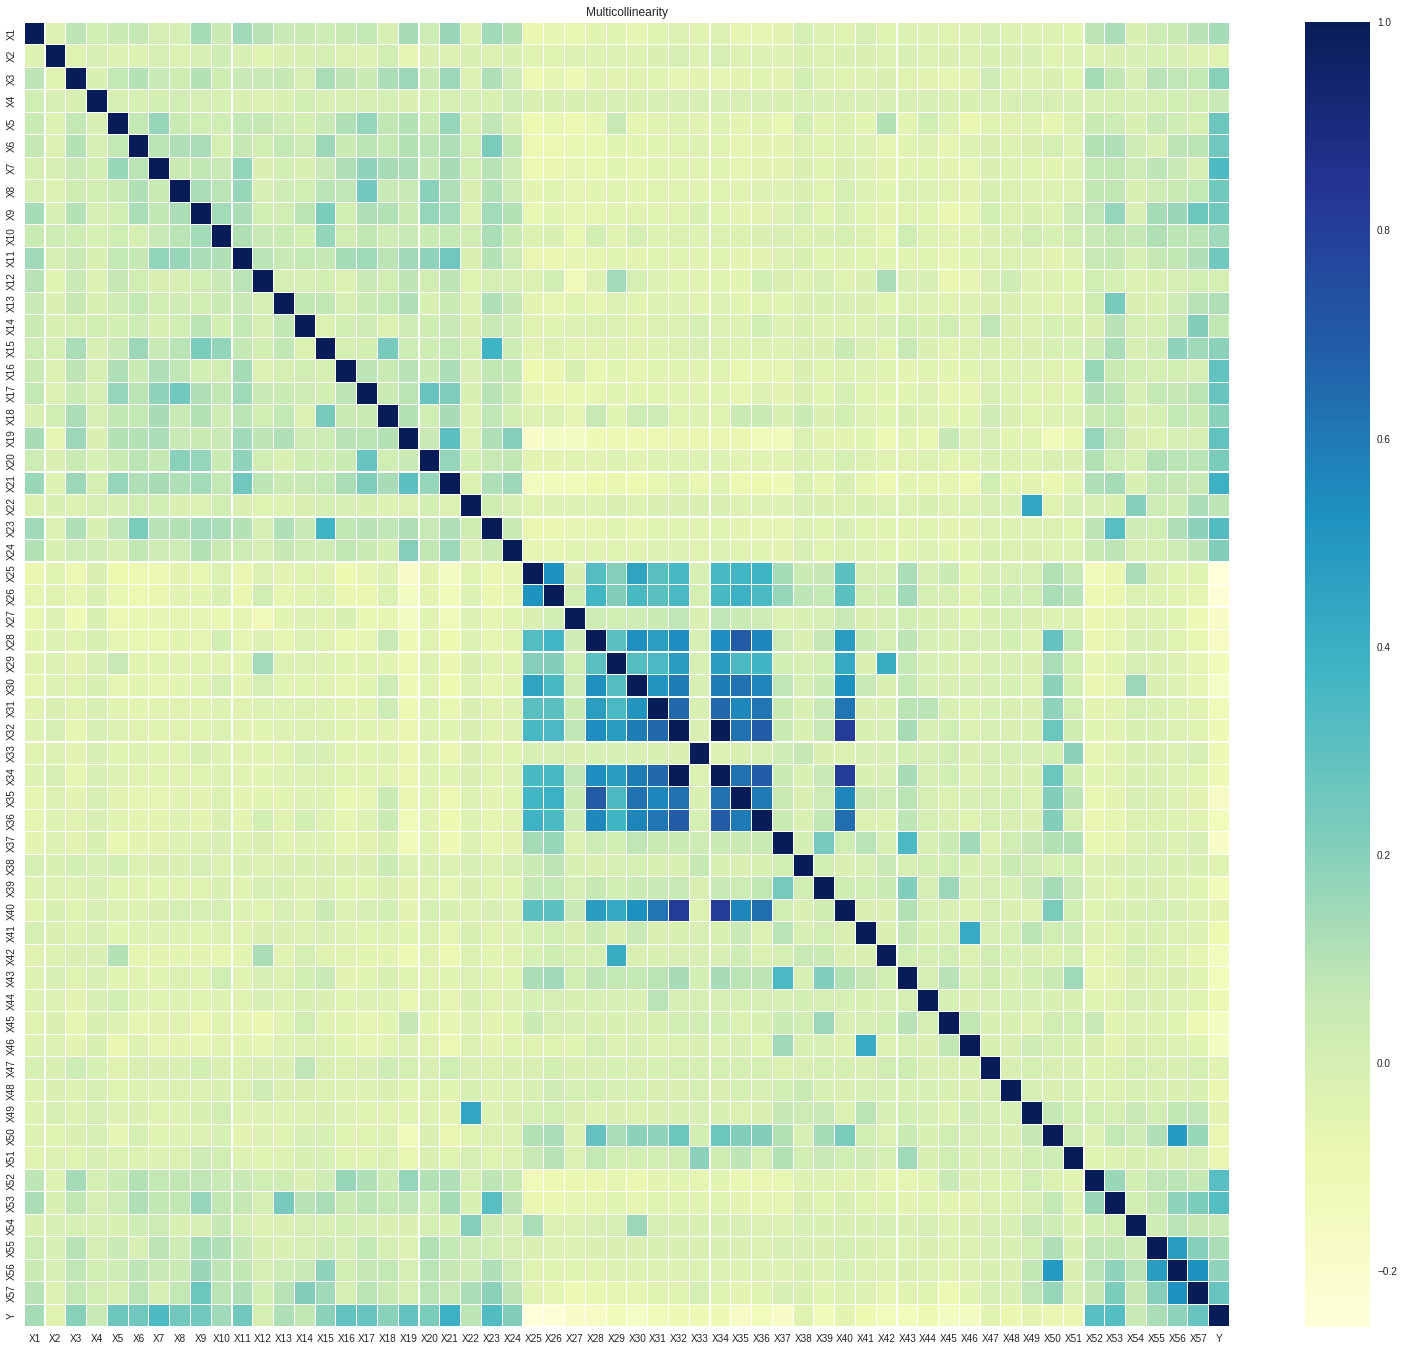

In [27]:
var_sel= list(train.nunique().index[train.nunique() > 1])

# Create correlation matrix
corrmat = train[var_sel].corr()

# Select upper triangle of correlation matrix
upper = corrmat.abs().where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
f, ax = plt.subplots(figsize =(27, 24)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.title('Multicollinearity')
# plt.savefig("multi-cllinearity.png")

In [28]:
# Drop the variable having r-value with any other predictor more than 0.75 
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

['X34', 'X40']

In [29]:
# Fixing the dropping variables
to_drop= ['X34', 'X40']
# Remove unwanted features
train.drop(to_drop ,axis=1, inplace=True)

## Analysis and substitution of missing values

In [30]:
print(train.shape)
print(test.shape)

# Check the distribution of missing values
print((train.isnull().sum())[(train.isnull().sum()) >0].sort_values(ascending=False))
print((train.isnull().sum()/train.shape[0])[(train.isnull().sum()) >0].sort_values(ascending=False))

(2932, 58)
(978, 58)
Series([], dtype: int64)
Series([], dtype: float64)


In [33]:
train.Y.value_counts()

0    1778
1    1154
Name: Y, dtype: int64

## Binary Classification experimentation environment set-up

In [35]:
class_set_up = setup(data = train, target = 'Y', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2932, 56)"
5,Missing Values,False
6,Numeric Features,55
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9459,0.9853,0.9220,0.9398,0.9304,0.8862,0.8868,0.229
rf,Random Forest Classifier,0.9410,0.9810,0.9008,0.9478,0.9231,0.8754,0.8768,0.668
gbc,Gradient Boosting Classifier,0.9410,0.9821,0.9083,0.9410,0.9238,0.8757,0.8768,0.619
et,Extra Trees Classifier,0.9410,0.9807,0.9083,0.9402,0.9239,0.8758,0.8763,0.561
ada,Ada Boost Classifier,0.9366,0.9733,0.9158,0.9238,0.9193,0.8672,0.8678,0.214
lr,Logistic Regression,0.9152,0.9661,0.8785,0.9039,0.8908,0.8215,0.8221,0.763
dt,Decision Tree Classifier,0.9015,0.8966,0.8735,0.8778,0.8748,0.7937,0.7948,0.039
lda,Linear Discriminant Analysis,0.8913,0.9496,0.7980,0.9147,0.8523,0.7670,0.7715,0.033
ridge,Ridge Classifier,0.8908,0.0000,0.7968,0.9146,0.8515,0.7659,0.7705,0.015
nb,Naive Bayes,0.8231,0.9401,0.9504,0.7047,0.8090,0.6512,0.6769,0.016


In [37]:
# LightGBM is the best model, hence it is selected for further processing
lightgbm_bin = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9515,0.9837,0.9753,0.9080,0.9405,0.8996,0.9012
1,0.9417,0.9795,0.9259,0.9259,0.9259,0.8779,0.8779
2,0.9415,0.9929,0.9012,0.9481,0.9241,0.8765,0.8772
3,0.9317,0.9790,0.9136,0.9136,0.9136,0.8571,0.8571
4,0.9220,0.9668,0.8642,0.9333,0.8974,0.8346,0.8362
5,0.9561,0.9918,0.9259,0.9615,0.9434,0.9076,0.9080
6,0.9463,0.9887,0.9259,0.9375,0.9317,0.8875,0.8875
7,0.9317,0.9811,0.8750,0.9459,0.9091,0.8545,0.8562
8,0.9707,0.9966,0.9625,0.9625,0.9625,0.9385,0.9385


In [38]:
# Hyperparamater / fine tuning the model
tuned_lightgbm_bin = tune_model(lightgbm_bin)
print(tuned_lightgbm_bin)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9563,0.9801,0.9753,0.9186,0.9461,0.9094,0.9106
1,0.9612,0.9836,0.9383,0.9620,0.9500,0.9183,0.9185
2,0.9463,0.9894,0.9136,0.9487,0.9308,0.8870,0.8874
3,0.9366,0.9761,0.9383,0.9048,0.9212,0.8682,0.8686
4,0.9268,0.9610,0.8765,0.9342,0.9045,0.8453,0.8464
5,0.9610,0.9823,0.9259,0.9740,0.9494,0.9177,0.9184
6,0.9268,0.9869,0.8642,0.9459,0.9032,0.8446,0.8468
7,0.9463,0.9667,0.8875,0.9726,0.9281,0.8854,0.8878
8,0.9659,0.9902,0.9375,0.9740,0.9554,0.9278,0.9282


LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


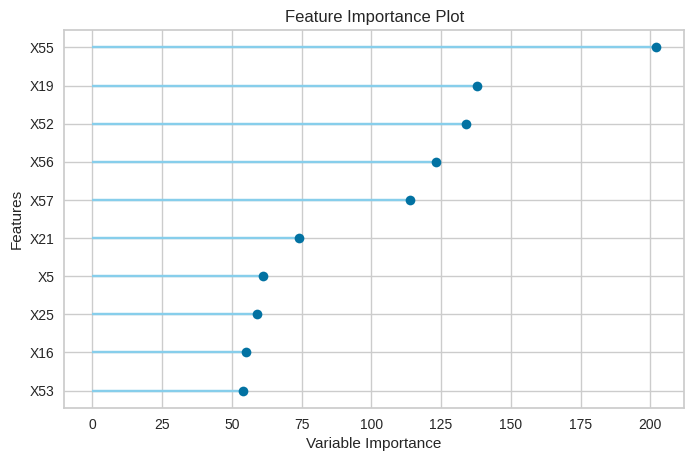

In [39]:
# Feature importance
plot_model(tuned_lightgbm_bin, plot = 'feature')

## Prediction explaination

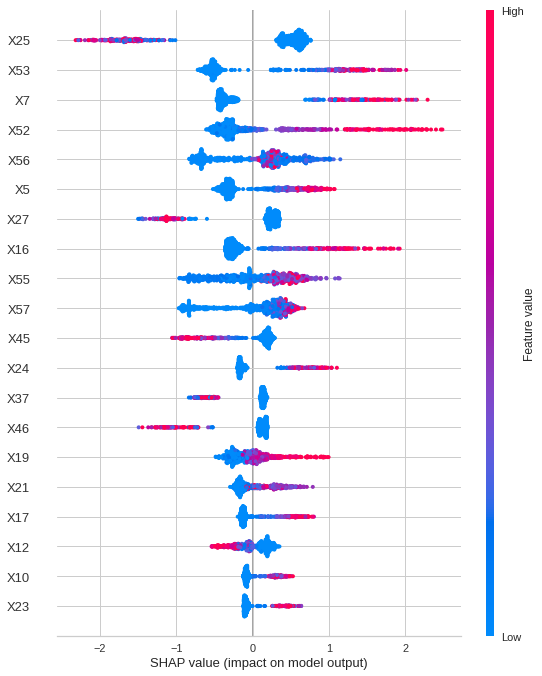

In [40]:
interpret_model(tuned_lightgbm_bin)

## Model performance

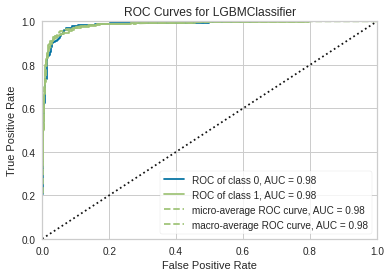

In [41]:
plot_model(tuned_lightgbm_bin)

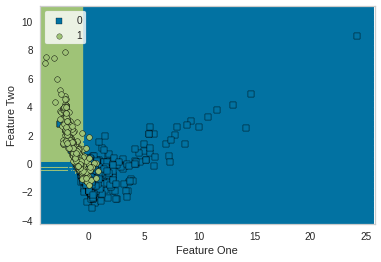

In [42]:
plot_model(tuned_lightgbm_bin, plot='boundary')

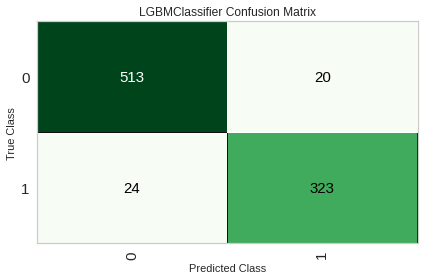

In [43]:
# Model performance on the holdout dataset
plot_model(tuned_lightgbm_bin, plot = 'confusion_matrix')

In [44]:
train_holdout = predict_model(tuned_lightgbm_bin)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.95,0.9836,0.9308,0.9417,0.9362,0.8951,0.8952


In [45]:
optimize_threshold(tuned_lightgbm_bin)#, true_negative = 1500, false_negative = -5000)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

## Prepare the final model for deployment

In [46]:
final_lightgbm_bin = finalize_model(tuned_lightgbm_bin)
# Save the model
# create an iterator object with write permission - model.pkl
with open('final_lightgbm_bin', 'wb') as files:
    pickle.dump(final_lightgbm_bin, files)

## Verify the performance on the test dataset

In [47]:
test.drop(to_drop,axis=1, inplace=True)

unseen_predictions = predict_model(final_lightgbm_bin, data=test)#, probability_threshold=0.1)
unseen_predictions.Score1 = unseen_predictions.apply(lambda x: 1-x.Score if x.Label=='NORMAL' else x.Score, axis=1)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9519,0.9865,0.9132,0.9612,0.9366,0.8979,0.8987


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X51,X52,X53,X54,X55,X56,X57,Y,Label,Score
2793,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.08,0.0,0.0,...,0.0,0.000,0.000,0.0,1.833,18,935,0,0,0.9610
2803,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.000,0.000,0.0,3.222,9,29,0,0,0.9856
2218,1.36,0.0,0.68,0.0,0.0,0.0,0.68,0.00,0.0,0.0,...,0.0,1.706,0.200,0.0,4.281,38,137,1,1,0.9942
3111,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.000,0.000,0.0,1.850,15,37,0,0,0.9967
3161,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.000,0.763,0.0,2.181,6,24,0,0,0.7365


In [50]:
from sklearn.metrics import classification_report

print(classification_report(unseen_predictions.Y, unseen_predictions.Label))#, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       598
           1       0.96      0.91      0.94       380

    accuracy                           0.95       978
   macro avg       0.95      0.94      0.95       978
weighted avg       0.95      0.95      0.95       978



In [52]:
pd.crosstab(unseen_predictions.Y, unseen_predictions.Label)

Label,0,1
Y,,
0,584,14
1,33,347


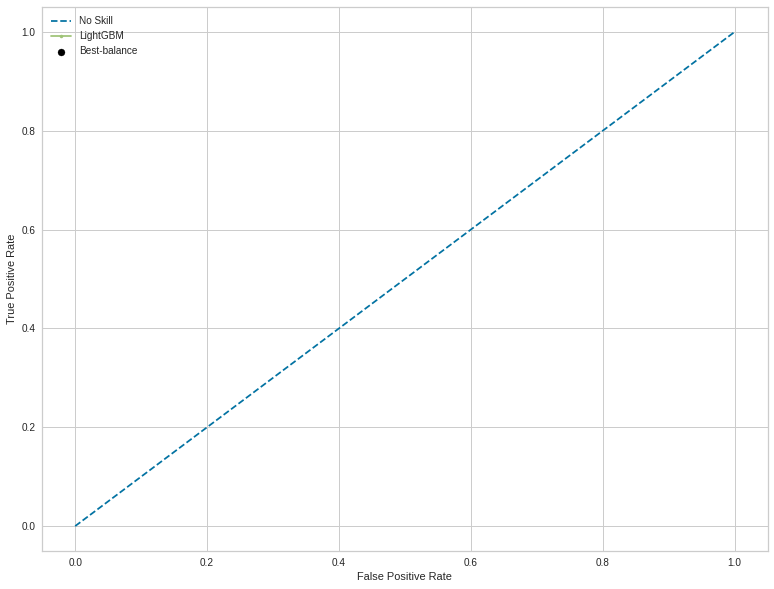

In [53]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve
## Get thresholds for gmax
# ROC Plot and score
fpr, tpr, thresholds = roc_curve(unseen_predictions.Y.apply(lambda x: 0 if x=='NORMAL' else 1), unseen_predictions.Score1, pos_label=1)
# get gmeans
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

# get threshold when geometric mean is greatest.
roc_threshold = thresholds[ix]

# plot the roc curve for the model
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot([0,1], [0,1], linestyle='--', label='No Skill')
ax.plot(fpr, tpr, marker='.', label='LightGBM')

# Add gmax value
ax.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best-balance')

# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Conclusion

(1) This is a case of time series metrics dataset. <br>
(2) The given training dataset is very small. This has resulted into overfitting of the model. <br>
(3) The model has done a decent job as precision of FAIL detection (Incidents) and Recall of NORMAL status detection are as high as 0.99
